# Perceptron

In this notebook, we first briefly introduce the concept of single neuron perceptron model. Then we illustrate the perceptron algorithm and implement the perceptron algorithm with python class. At last, we will implement the perceptron algorithms into analysis of palmer penguins, where we want to judge the sex of a penguins based on its body mass and flipper length.

---

## Introduction

In machine learning, the [Perceptron](https://en.wikipedia.org/wiki/Perceptron) is an algorithm for supervised learning of binary classifiers. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The model structure is depicted in the figure below.

<p align="center">
    <img src="Perceptron.png">
</p>

---
### Algorithm <a class="anchor" id="Algorithm"></a>

#### Perceptron <a class="anchor" id="Perceptron"></a>
First a function that maps input $\mathbf {x}$  (a real-valued vector) to an output value $f(\mathbf {x} )$ (a single binary value) is given by

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0,\\0 & \text{otherwise}\end{cases}
$$

where $\mathbf {w}$  is a vector of real-valued weights, $\mathbf {w} \cdot \mathbf {x} = \sum_{i=1}^{m} {w_{i}x_{i}}$ is the dot product,  $m$ is the number of inputs to the perceptron.

And the algorithm is
1. Initialize random small weights.
2. For each sample $\mathbf{x}_j$ and $y_j$, perform the following steps:
   - Calculate the actual output:
$$
y_j(t) = f[\mathbf{x}_j^T\cdot\mathbf{w}(t)]
$$
   - Update the weights:
$$
\mathbf{w}(t+1) = \mathbf{w}(t) \boldsymbol{+} \cdot  \mathbf{x}_j^T(\mathbf{d} - \mathbf{y}(t))
$$

3. Updates the weights after steps 2, until meets stopping criterias.

---

## Coding
We will build a python class to realize the perceptron algorithms, the coding class is shown as follows.

In [1]:
class Perceptron(object):
    def __init__(self, eta = .005, epochs = 1000):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

## Implementation

After showing the code part of the perceptron algorithm, we will implement the code into the dataset. The dataset is palmer penguins, we want to use perceptron algorithms to judge the sex of penguins based on body_mass and flipper_length features.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("./Datasets/palmer_penguins.csv")

The dataset features is shown as follows, we will use 300 samples in the model

In [4]:
df.iloc[:300]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,2,Adelie,Torgersen,40.3,18.0,195,3250,Female
3,4,Adelie,Torgersen,36.7,19.3,193,3450,Female
4,5,Adelie,Torgersen,39.3,20.6,190,3650,Male
...,...,...,...,...,...,...,...,...
295,303,Gentoo,Biscoe,50.0,15.9,224,5350,Male
296,304,Gentoo,Biscoe,44.9,13.8,212,4750,Female
297,305,Gentoo,Biscoe,50.8,17.3,228,5600,Male
298,306,Gentoo,Biscoe,43.4,14.4,218,4600,Female


The perceptron can take in any number of feature measurments, but for simplicity we focus our attention on just two feature measurements, namely "body mass" and "flipper length". Moreover, we need to also convert the sex of penguins to numerical values; for example, map "Female" species to -1 and "Male" species to 1. The following code preproccesses our data into these desired formats. 

In [5]:
# Store the desired species values in the numpy array y
y = df.iloc[0:300].sex.values
# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'Female', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["flipper_length_mm", "body_mass_g"]].iloc[:300].values

Next we can instantiate an instance of the ```Perceptron``` class and also train this instance over 1000 epochs by running the following code in the cell below. 

In [7]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

---

After training has finished we can call the ```Perceptron``` class ```predict``` method to view its current predictions given input features. We can quickly view these predictions on the entries in ```X``` by running the following code in the cell below.

---

In [8]:
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y == y_hat)

[False  True  True  True False  True  True  True False False  True  True
 False  True False  True False  True False False  True False  True  True
 False  True False  True False  True False False  True  True  True  True
 False  True False  True  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True  True  True False  True False False  True False  True
  True False  True  True  True False  True False  True False  True False
  True False  True False  True False  True  True  True  True  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False False  True  True False
  True False  True False False  True False  True  True False  True False
  True False  True False  True False False  True  T

As we can see from the output of the code above, the predicted values have matched the true values on the given data. We can visualize this in the Euclidian plane by calling the ```plot_decision_regions``` function imported at the top of this notebook. This function will scatter the penguins data in the plane and also show the regions of space where a given point will be classified either -1 or 1. 

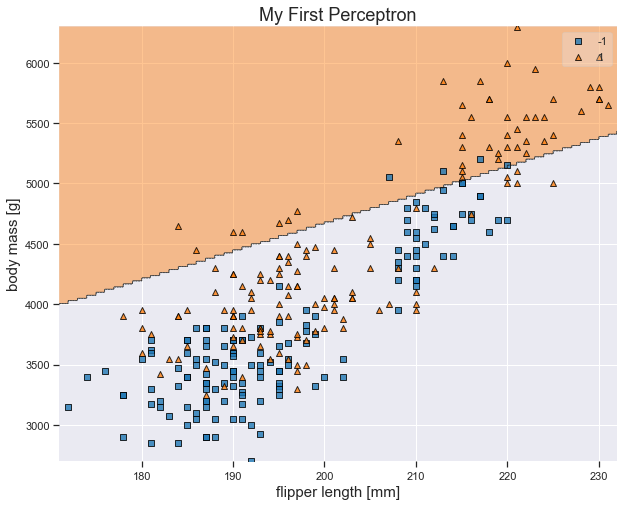

In [9]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("flipper length [mm]", fontsize = 15)
plt.ylabel("body mass [g]", fontsize = 15)
plt.show()

As shown from the output of the code above, we have found a nice linear seperator which has classified our data. Next, we will print the error against training process to show how the model result lower error via iteration.


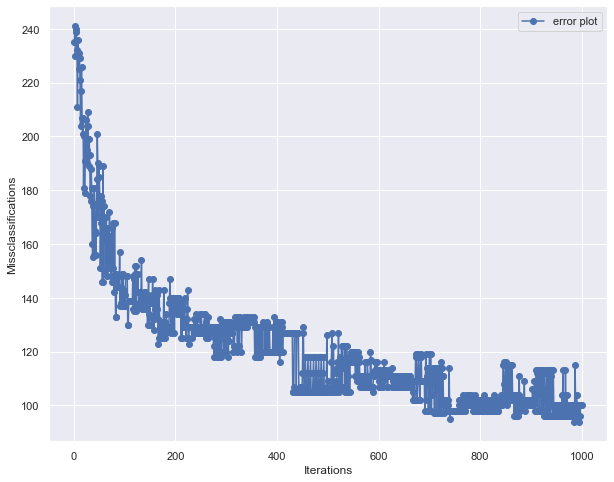

In [10]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()


# Conclusion 

We have shown that the perceptron model works well on classifying the sex of palmer penguins. And the training error, overall, decreases in the iteration.
